In [105]:
# Installing Libraries
! pip install dfply
! pip install pandas-ply
! pip install pandasql
! pip install pywaffle


pyasn1-modules 0.2.1 has requirement pyasn1<0.5.0,>=0.4.1, but you'll have pyasn1 0.1.9 which is incompatible.
grpcio 1.11.0 has requirement protobuf>=3.5.0.post1, but you'll have protobuf 3.4.1 which is incompatible.
pyasn1-modules 0.2.1 has requirement pyasn1<0.5.0,>=0.4.1, but you'll have pyasn1 0.1.9 which is incompatible.
grpcio 1.11.0 has requirement protobuf>=3.5.0.post1, but you'll have protobuf 3.4.1 which is incompatible.
grpcio 1.11.0 has requirement protobuf>=3.5.0.post1, but you'll have protobuf 3.4.1 which is incompatible.
pyasn1-modules 0.2.1 has requirement pyasn1<0.5.0,>=0.4.1, but you'll have pyasn1 0.1.9 which is incompatible.
pyasn1-modules 0.2.1 has requirement pyasn1<0.5.0,>=0.4.1, but you'll have pyasn1 0.1.9 which is incompatible.
grpcio 1.11.0 has requirement protobuf>=3.5.0.post1, but you'll have protobuf 3.4.1 which is incompatible.


### Introduction	

Cricket is a bat and ball game played between two teams of eleven players each on a cricket field, at the center of which is a rectangular 20-meter pitch with a target at each end called the wicket. Each phase of play is called innings. During each innings one team bats, attempting to score as much runs as possible while the other team bowl and field, attempting to minimize the number of runs scored. When each innings ends, the teams swap role for the next innings. The winning team is the one who scores the most runs.

The Indian Premier League (IPL) is a professional Twenty20 cricket league in India. The IPL is the most-attended cricket league in the world and in 2014 ranked sixth by average attendance among all sports leagues. There have been ten seasons of the IPL tournament. 

The aim of this paper is to carry out the detailed analysis of ten seasons of IPL Tournament. Ball by ball data of 634 IPL Matches played in last 10 seasons (till 2017) was used to carry out detailed descriptive analysis of match and team statistics. The paper discusses the correlation between the team and match statistics and their impact on the performance of the team in the tournament. This paper also list the findings of the machine learning algorithms carried on the data set to predict the winner of a match and runs scored by teams in a particular match.

### Data Collection & Cleaning

The data for the analysis is gathered from Indian Premier League (Cricket) Kernel at Kaggle. The kernel has two data sets in csv format. ‘deliveries.csv’ contains the ball by ball details and ‘matches.csv’ contains the match details for all matches for all seasons.

The data set was already in a tidy format, so not much preprocessing on the data set was required. Three unused columns (umpire1, umpire2, umpire 3) from the ‘matches’ dataset were dropped. The long IPL Team names were replaced by their abbreviation in the matches and deliveries dataset. For eg. “Royal Challengers Bangalore” was replace by “RCB”.

### Analysis

The analysis of cricket matches was carried out in R. For the analysis of the data set we have used various packages of R library. We have used ‘dplyr’ & ‘tidyr’, ‘sqldf’ package for data munging and data wrangling, ‘gglot2’, ‘corrgram’ & ’ellipse’ to create visualizations & graphs from the curated data and ‘randomforest’,’caTools’ & ‘mlbench’ to run predictive analytics. The R Scripts files used for descriptive analytics, data visualization and predictive analytics are available for download along with this paper. 

### Exploratory Data Analysis

The process of analyzing data sets, summarizing their main characteristics and present them visually is known as Exploratory Data Analysis. EDA might contain a statistical model, but it primary purpose is to uncover trends and patterns beyond the formal modelling and hypothesis testing tasks. We have carried out an Exploratory Data Analysis for our Cricket Matches Dataset using Match and Team Statistics. The correlation between the team and match statistics and their impact on the performance of the team in the tournament are discussed below. 
An exhaustive number of Team and Match statistics have been calculated from the deliveries and matches data sets. The statistics used in the explorative and predictive analytics are as per below. 

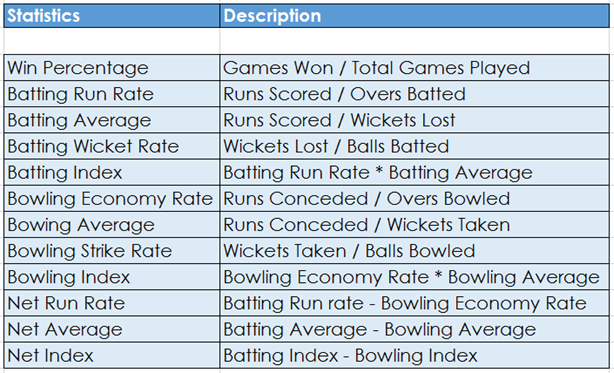

The calculations and data wrangling required for creation of the Team and Match Statistics were done in SQL language. The code was written in R Studio using ‘sqldf’ R package. The files were then saved as CSV and exported to Python for further analysis.

The results of the Exploratory Data Analysis are as per below.



In [106]:
# Useful Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
from dfply import *
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
import matplotlib.pyplot as plt
from pywaffle import Waffle

import sklearn
from sklearn import ensemble
from sklearn import datasets
from sklearn import model_selection
from sklearn.linear_model import LinearRegression as lm
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Ignore Warnings
warnings.filterwarnings('ignore')

# Graph Inline
output_notebook()
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Loading BokehJS ...

In [107]:
url_deliveries = "deliveries.csv"
url_matches = "matches.csv"
url_indices_match = "indices_match.csv"
url_indices_team = "indices_team.csv"
url_stats_team = "stats_team.csv"

#url_deliveries = "https://dl.dropboxusercontent.com/content_link/3INPCr1iYAXK5alUx2KP9Bq0jxdnaNEi0DpIUUL65hYAPqv44UvXAynu6kAZmzjj/file"
#url_matches = "https://dl.dropboxusercontent.com/content_link/yB7HGJeOGca4h0H6jnNDDyxMvICPmllxkaTePp3oqPl8HDj46RoFONOe1GM0FglD/file"
#https://drive.google.com/file/d//view?usp=sharing

matches = pd.read_csv(url_matches)   
deliveries = pd.read_csv(url_deliveries,error_bad_lines=False)
indices_match = pd.read_csv(url_indices_match)
indices_team = pd.read_csv(url_indices_team)
stats_team = pd.read_csv(url_stats_team)

print('\n****************************************\n')
print("Matches Dataset Information : \n")
matches.info()
print('\nMatches Dataset Describe :\n')
matches.describe()
print('\nMatches Dataset Sample :')
print('\n****************************************\n')
matches.sample(4)


****************************************

Matches Dataset Information : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
id                 636 non-null int64
season             636 non-null int64
city               629 non-null object
date               636 non-null object
team1              636 non-null object
team2              636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             633 non-null object
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
umpire1            635 non-null object
umpire2            635 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(5), object(12)
memory usage: 89.5+ KB

Matches Dataset Describe :



,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,0.025157,13.682390,3.372642,NaN
std,183.741666,2.773026,0.156726,23.908877,3.420338,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,0.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,0.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,1.000000,146.000000,10.000000,NaN



Matches Dataset Sample :

****************************************



,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
626,627,2016,Kanpur,2016-05-19,Kolkata Knight Riders,Gujarat Lions,Gujarat Lions,field,normal,0,Gujarat Lions,0,6,DR Smith,Green Park,AK Chaudhary,CK Nandan,NaN
269,270,2011,Kolkata,2011-04-30,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,8,Iqbal Abdulla,Eden Gardens,AM Saheba,SL Shastri,NaN
586,587,2016,Bangalore,2016-04-17,Royal Challengers Bangalore,Delhi Daredevils,Delhi Daredevils,field,normal,0,Delhi Daredevils,0,7,Q de Kock,M Chinnaswamy Stadium,VA Kulkarni,A Nand Kishore,NaN
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN


In [108]:
# Drop Umpire3 since its a blank column
matches = matches >> drop(X.umpire3,X.umpire1,X.umpire2)  

# Replace all Nan with 0
deliveries = deliveries.fillna(0,inplace=False) 

# Replace Team Names With Their Abbreviation
matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

deliveries.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

print('\n****************************************\n')
print("Matches Dataset Information : \n")
matches.info()

print('\n****************************************\n')
print("Deliveries Dataset Information : \n")
deliveries.info()
print('\n****************************************\n')


****************************************

Matches Dataset Information : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 15 columns):
id                 636 non-null int64
season             636 non-null int64
city               629 non-null object
date               636 non-null object
team1              636 non-null object
team2              636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             633 non-null object
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
dtypes: int64(5), object(10)
memory usage: 74.6+ KB

****************************************

Deliveries Dataset Information : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):

In [109]:
# Teams List
print('\n****************************************\n')
print("Teams in Indian Premier League : \n")
matches >> select(X.team1) >> distinct(X.team1)
print('\n****************************************\n')

#  City List
print("Cities in which IPL Matches have been Played : \n")
matches >> select(X.city) >> distinct(X.city)
print('\n****************************************\n')

#  Venue List
#print("Venues at which IPL Matches have been Played : \n")
#df_mat >> select(X.venue) >> distinct(X.venue)
#print('\n****************************************\n')




****************************************

Teams in Indian Premier League : 



,team1
0,SRH
1,MI
2,GL
3,RPS
4,RCB
6,KKR
8,DD
10,KXIP
60,CSK
61,RR



****************************************

Cities in which IPL Matches have been Played : 



,city
0,Hyderabad
1,Pune
2,Rajkot
3,Indore
4,Bangalore
6,Mumbai
10,Kolkata
14,Delhi
31,Chandigarh
48,Kanpur



****************************************



,Batting_Run_Rate,Batting_Average,Batting_Wicket_Rate,Batting_Index,Bowling_Economy_Rate,Bowling_Average,Bowling_Strike_Rate,Bowling_Index,Net_Run_Rate,Net_Average,Net_Rate,Net_Index,Winning_Percentage
Batting_Run_Rate,1.000000,0.998366,-0.445960,0.992787,0.592243,0.579408,0.312745,0.614010,-0.038654,0.576110,-0.477720,-0.033193,0.399903
Batting_Average,0.998366,1.000000,-0.456964,0.992252,0.587590,0.576427,0.310856,0.609355,-0.034021,0.580967,-0.483655,-0.027723,0.403113
Batting_Wicket_Rate,-0.445960,-0.456964,1.000000,-0.416368,-0.001222,0.065631,-0.272897,0.027367,-0.308788,-0.593220,0.810224,-0.345284,-0.495268
Batting_Index,0.992787,0.992252,-0.416368,1.000000,0.575122,0.589502,0.324448,0.609366,-0.022441,0.558993,-0.465794,-0.021954,0.383034
Bowling_Economy_Rate,0.592243,0.587590,-0.001222,0.575122,1.000000,0.845705,-0.265173,0.958055,-0.828050,-0.163633,0.160768,-0.778746,-0.169184
Bowling_Average,0.579408,0.576427,0.065631,0.589502,0.845705,1.000000,-0.242948,0.951101,-0.645633,-0.330215,0.190279,-0.759245,-0.287379
Bowling_Strike_Rate,0.312745,0.310856,-0.272897,0.324448,-0.265173,-0.242948,1.000000,-0.265530,0.546461,0.601066,-0.784980,0.576977,0.604437
Bowling_Index,0.614010,0.609355,0.027367,0.609366,0.958055,0.951101,-0.265530,1.000000,-0.760887,-0.243472,0.179396,-0.806076,-0.226977
Net_Run_Rate,-0.038654,-0.034021,-0.308788,-0.022441,-0.828050,-0.645633,0.546461,-0.760887,1.000000,0.603790,-0.531777,0.942657,0.488067
Net_Average,0.576110,0.580967,-0.593220,0.558993,-0.163633,-0.330215,0.601066,-0.243472,0.603790,1.000000,-0.748209,0.724228,0.751891


[Text(78.8937,0.5,'Cricket Statistics'),
 Text(0.5,59.0938,'Cricket Statistics')]

Text(0.5,1,'Cricket Statistics Correlation Matrix')

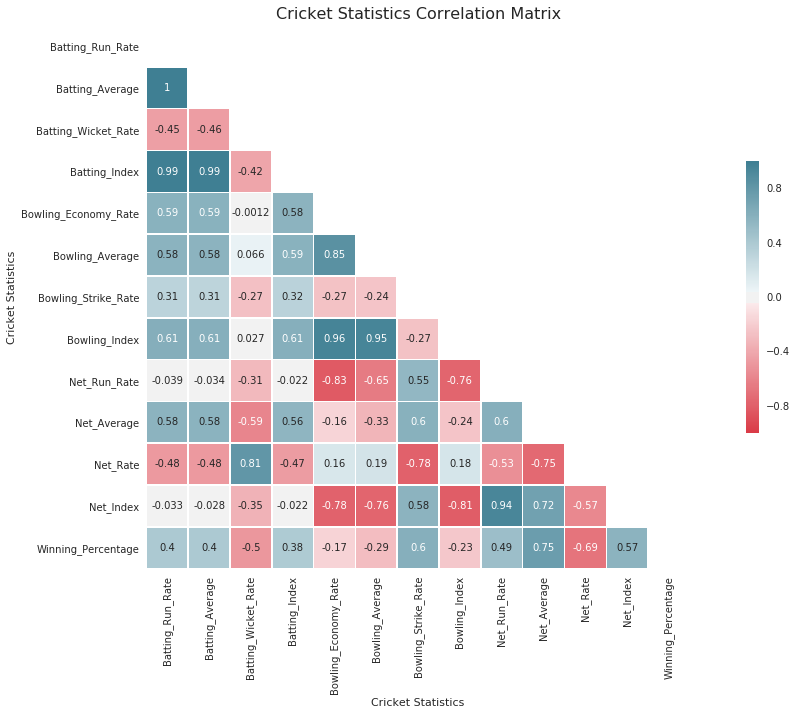

In [110]:
#***************************
# Team Stats - Season Wise #
#***************************

data = pysqldf("""SELECT Batting_Run_Rate, Batting_Average,  Batting_Wicket_Rate,  
              Batting_Index, Bowling_Economy_Rate, Bowling_Average,  
              Bowling_Strike_Rate, Bowling_Index, Net_Run_Rate, 
              Net_Average, Net_Rate, Net_Index, winning_percentage As Winning_Percentage
              FROM indices_team""")

# Compute the correlation matrix
corr = data.corr()

corr

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

heatmap.figure.set_size_inches(16,8)
heatmap.set(xlabel = "Cricket Statistics", ylabel = "Cricket Statistics")
heatmap.set_title('Cricket Statistics Correlation Matrix', fontsize=16)
heatmap.figure.set_size_inches(20,10)

### Correlation Matrix – Match Statistics

Correlation Matrix is used to investigate the dependence between multiple variables at the same time. It is a basically a table containing the correlation coefficients between each variable and the others. Correlation is used to evaluate the association between two or more variables. The correlation coefficient r measures the strength and direction of linear relationship between two variables. The value is always between +1 and -1. 

The correlation between various team and match statistics are shown above

#### Analysis

The above correlation matrix shows the correlation between various team and match statistics. The ones most interest to us is between Total_Run and other statistics.

•	Total_Runs have highest positive relationship with Net_Average and Winning Percentage. So increase in runs leads to more number of wins for the team and a good Net Average.

•	Total_Runs parameter has moderate positive correlation with all the Batting parameters and no correlation or a weak correlation with Bowling Parameters. 

•	Batting_Indice, Batting_Average & Batting Run Rate have a very positive correlation among themselves (almost equal to 1).

•	Bowling_Economy Rate, Bowling_Indice & Bowling_Average have a very positive correlation among themselves 
(almost equal to 1).



'Team'

[Text(33,0.5,'Team'), Text(0.5,40.4014,'Cricket Statistics')]

Text(0.5,1,'Team Comparison On Statistics')

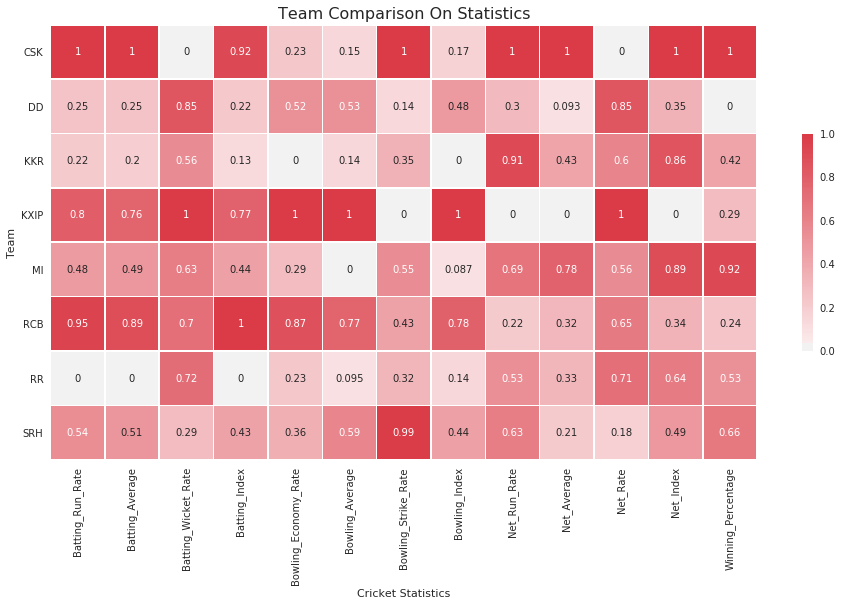

In [111]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Fetch Data
data = pysqldf("""SELECT Team, 
              avg(Batting_Run_Rate) AS Batting_Run_Rate, avg(Batting_Average) AS Batting_Average, 
              avg(Batting_Wicket_Rate) AS Batting_Wicket_Rate, avg(Batting_Index) AS Batting_Index, 
              avg(Bowling_Economy_Rate) AS Bowling_Economy_Rate, avg(Bowling_Average) AS Bowling_Average, 
              avg(Bowling_Strike_Rate) AS Bowling_Strike_Rate, avg(Bowling_Index) AS Bowling_Index, 
              avg(Net_Run_Rate) AS Net_Run_Rate, avg(Net_Average) AS Net_Average, 
              avg(Net_Rate) AS Net_Rate, avg(Net_Index) AS Net_Index, avg(winning_percentage) as Winning_Percentage
              FROM indices_team  
              WHERE Team IN ('CSK', 'DD', 'KXIP', 'KKR', 'MI', 'RR', 'RCB', 'SRH')
              GROUP BY Team""") 

# Rescale The Data
def scaleColumns(df, cols_to_scale):
    for col in cols_to_scale:
        df[col] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(df[col])),columns=[col])
    return df

columns = data.columns.values.tolist()
columns.pop(0)

data = scaleColumns(data,columns)

# Assigning Index
data = data.set_index('Team')

cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap 
heatmap = sns.heatmap(data, cmap=cmap, vmin=0, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
heatmap.figure.set_size_inches(16,8)
heatmap.set(xlabel = "Cricket Statistics", ylabel = "Team")
heatmap.set_title('Team Comparison On Statistics', fontsize=16)




### Heatmap – Teams Vs Team Statistics

A heatmap is a graphical representation of data where the individuals values contained in a matrix are represented as colors. 
Analysis

We have created a heat map of various team & match statistics and the IPL teams. The average of team statistics for all the playing teams were calculated and were normalized and rescaled to bring them on the same scale.

•	CSK – Chennai Super King is the leading in all the Batting Statistics other than Batting Wicket Rate. They are also leading in all the Net Statistics leaving out Net Rate. No wonder their Winning Percentage is highest among all the teams.

•	Kings Eleven Punjab (KXIP) and Royal Challengers Bangalore (RCB) are among the top in majority of the Batting and Bowling Statistics. KXIP is weak in Bowling Strike Rate, Net Average, and Net Indices though as compared to other teams.

•	KKR, DD and RR are among the last teams in Batting and Bowling Statistics. But they do clock in some decent Net Statistics



Toss Decision (Field/Bat) Season Wise :
****************************************
In the last four seasons majority of the toss winners have opted to field first. 
In 2012 equal number of teams decided to bat and field first on winning the toss.


[Text(0,0.5,'Toss Count'), Text(0.5,0,'IPL Season')]

Text(0.5,1,'Toss Decision Season Wise')

[(0, 50)]

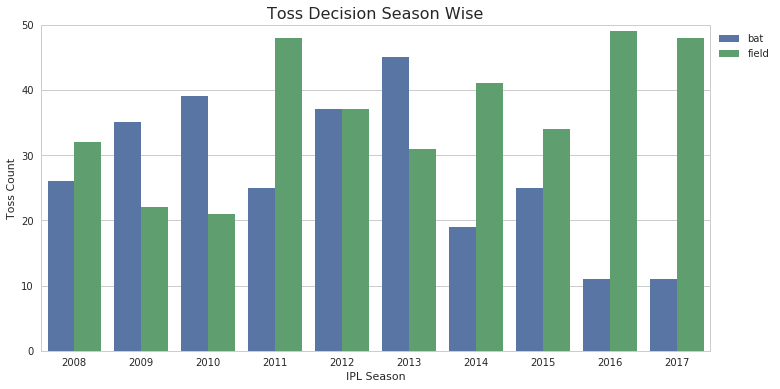

In [112]:
#  Toss Decision
print("Toss Decision (Field/Bat) Season Wise :")
print('****************************************')
print("""In the last four seasons majority of the toss winners have opted to field first. 
In 2012 equal number of teams decided to bat and field first on winning the toss.""")

df_one = (
        matches 
        >> group_by(X.season, X.toss_decision) 
        >> summarize(toss_count = X.toss_decision.count())
)

sns.set_style("whitegrid")
bar_one = sns.barplot(data = df_one, x = "season", y = "toss_count", 
                      hue = "toss_decision")
bar_one.set(xlabel = "IPL Season", ylabel = "Toss Count")
bar_one.set_title('Toss Decision Season Wise', fontsize=16)
bar_one.set(ylim=(0, 50))
bar_one.figure.set_size_inches(12,6)
bar_one.legend(bbox_to_anchor=(1, 1),loc=2)


### Toss Decision across Season

This section analyzes the Toss Decision taken by toss winning team across IPL seasons. The toss winning team has the option to decide whether to field or bat first. The Toss Decision is explained visually by a bar graph

#### Analysis

•	In 2009, 2010 & 2013 seasons teams chose to bat first after winning the toss.

•	In 2012 equal number of teams choose to ball and bat first.

•	After 2014 the general trend is that, teams decide to field first after winning the toss. There is a general increase in this trend after 2014.

•	In 2016 and 2017 season the number of times the teams decided to field first is approximately five times the number of times the teams decided to bat first after winning the toss.



Top Eight Teams Based on Cumulative Runs Across Seasons :
****************************************
   batting_team  run_count
7            MI      24521
9           RCB      23436
6          KXIP      23068
4           KKR      21965
2            DD      21953
0           CSK      20899
11           RR      17703
12          SRH      11652
1            DC      11463
8            PW       6358
3            GL       4862
10          RPS       4533
5           KTK       1901

Runs Per Over By Teams Across Season :
****************************************
Maximum runs are being scored in the last 5 overs of the match. 
Mumbai Indians and Royal Challengers Bangalore have shown a incresing trend 
in the runs scored throughout the match.


[Text(0,0.5,'Total Runs'), Text(0.5,0,'Overs')]

Text(0.5,1,'Runs Per Over By Teams Across Season')

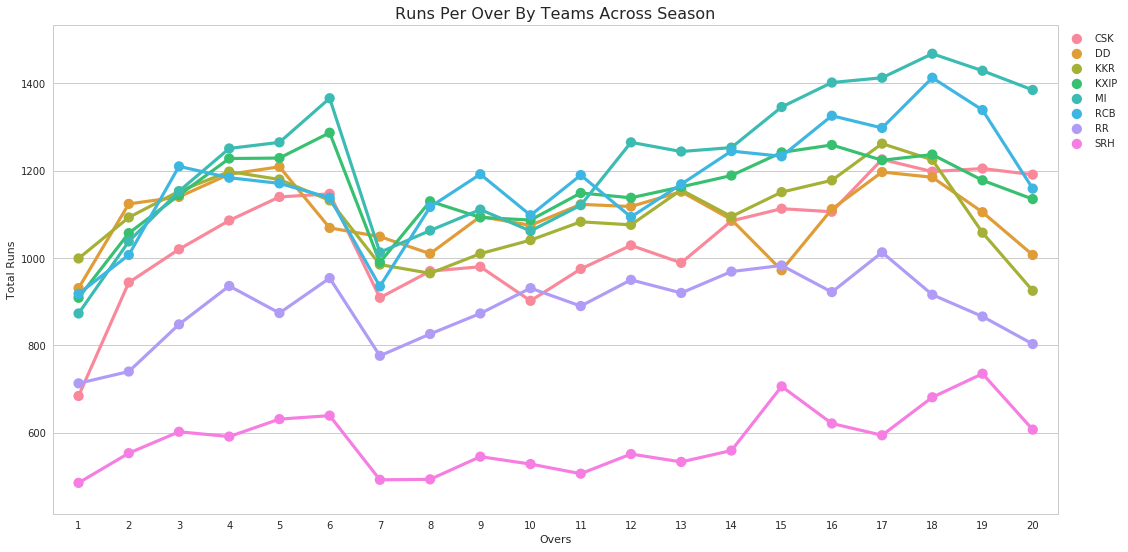

In [113]:
print("Top Eight Teams Based on Cumulative Runs Across Seasons :")
print('****************************************')

# Top Teams Sorted By Sum of Total_Runs Descending Order
top_teams = (
        deliveries 
        >> group_by(X.batting_team) 
        >> summarize(run_count = X.total_runs.sum())
) 

top_teams = top_teams.sort_values(by = 'run_count', ascending=False)

print(top_teams)

#  Toss Decision
print("\nRuns Per Over By Teams Across Season :")
print('****************************************')
print("""Maximum runs are being scored in the last 5 overs of the match. 
Mumbai Indians and Royal Challengers Bangalore have shown a incresing trend 
in the runs scored throughout the match.""")

# Top Eight Teams List
top_teams_list = top_teams.head(8)['batting_team'].tolist()

# Fetching Runs Across Teams Per Over
df_two = (
        deliveries 
        >> group_by(X.batting_team, X.over) 
        >> summarize(run_count = X.total_runs.sum()) 
)

# Filtering Data For Top Five Teams
df_two = df_two[df_two.batting_team.isin(top_teams_list)]

# Line Plot 
sns.set_style("whitegrid")
line_one = sns.pointplot(data = df_two, x = "over", y = "run_count", 
                         hue = "batting_team" , capsize = .2)
line_one.set(xlabel = "Overs", ylabel = "Total Runs")
line_one.set_title('Runs Per Over By Teams Across Season', fontsize=16)
line_one.figure.set_size_inches(18,9)
line_one.legend(bbox_to_anchor=(1, 1),loc=2)


### Total Runs Per Over across Season

This section analyzes the cumulative runs scored by teams across season per over. The total runs scored per over is explained visually by a line graph.

#### Analysis

•	Due to power play the runs scored per over by a team increase for the first six overs of the match. The power play is the name for the fielding restrictions in the first six overs of the Twenty20 cricket.

•	There is a sudden drop in runs scored in seventh over due to change in fielding setting after the power play ends.

•	There is a constant increase in runs scored in each over after 12th over.

•	MI, RCB, KXIP, SRH display a constant increase in runs scored per over, throughout the match.

•	The cumulative runs scored by SRH is on the lower side, because it’s the newest member of IPL family.

•	Since SRH is the newest member of IPL family, the cumulative runs scored by them per over is on the lower side



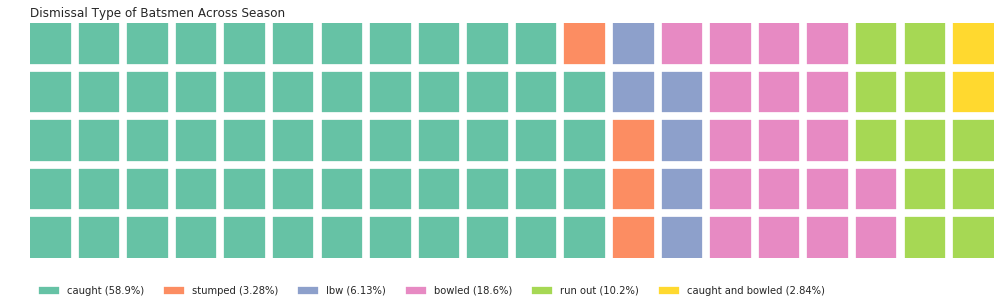

In [114]:
from pywaffle import Waffle

data = pysqldf("""SELECT dismissal_kind as 'Dismissal Kind' , count(dismissal_kind) as 'Count' 
               FROM deliveries
               WHERE player_dismissed <> 0
               AND dismissal_kind NOT IN ('retired hurt','obstructing the field', 'hit wicket')
               GROUP BY dismissal_kind 
               Order By Count DESC""")
data['Count'] = (data['Count'] / data['Count'].sum()) * 100

# Assigning Index
data = data.set_index('Dismissal Kind')

data = data.to_dict().get('Count')

waffle = plt.figure(
      FigureClass = Waffle, 
      rows=5, 
      values = data, 
      title={'label': 'Dismissal Type of Batsmen Across Season', 'loc': 'left'},
      labels=["{0} ({1:.3}%)".format(k, v) for k, v in data.items()],
      legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.2), 'ncol': len(data), 'framealpha': 0},
      figsize=(14, 7)
)


### Cause of Dismissal across Season

A batsman can be dismissed in a number of ways, the most common being bowled, caught, leg before wicket (LBW), stumped, run out and caught and bowled.  The cause of dismissal in percentages across season is explained visually by below waffle plot.

#### Analysis
•	Approximately 58% of the batsman are dismissed from the play due to being caught by a fielder. It is the most common cause of getting out.

•	The second highest reason (18%) for batsman getting out is being “bowled” by a bowler. The action of ball hitting the wickets is known as being “bowled”

•	About 10% of the batsman get “run out” while running between the wickets.

•	And 6% are declared out due to “Leg between Wickets - LBW” reason.



Text(0.5,0.98,'Distribution of Boundaries')

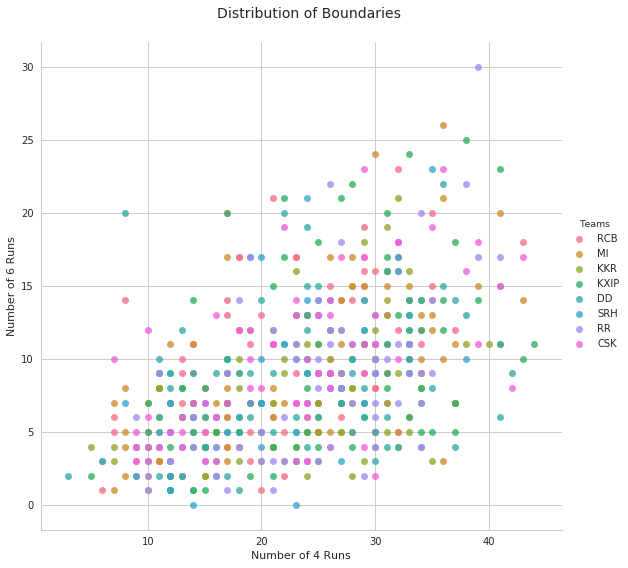

In [115]:
data = sqldf("""SELECT match_id as match, batting_team AS Teams
              ,COUNT(CASE WHEN batsman_runs = 4 THEN batsman_runs ELSE NULL END) as x
              ,COUNT(CASE WHEN batsman_runs = 6 THEN batsman_runs ELSE NULL END) as y
              ,SUM(total_runs) as total_Runs
              FROM deliveries d
              INNER JOIN matches m ON d.match_id = m.id
              WHERE batting_team IN ('CSK', 'DD', 'KXIP', 'KKR', 'MI', 'RR', 'RCB', 'SRH')
              GROUP BY match_id
              ORDER BY match_id""")

lmplot = sns.lmplot(data=data, x="x", y="y", hue="Teams", size=8, fit_reg=False)
lmplot.set_axis_labels("Number of 4 Runs", "Number of 6 Runs")
lmplot.fig.subplots_adjust(top=.92)
lmplot.fig.suptitle('Distribution of Boundaries', fontsize=14)


### Boundaries Hit Per Match across Season

In cricket a boundary is the edge or boundary of the playing field, or a scoring shot where the ball is hit to or beyond that point. A boundary is the scoring of four or six runs from a single delivery with the ball reaching the boundary of the field. The below pair plot (scatter plot + density plot) compares the number of 4’s to number of 6’s hit by batsman per match across season.

#### Analysis
•	There is a moderate positive correlation between the number of four and number of six hit in a match. 

•	Match wise the total number of 4’s hit by the batsman is greater than the total number of 6’s.

•	MI, KXIP, RR, CSK are the teams with the highest number of six and four runs scored in a match.

•	The density plot of the Fours is skewed towards the left. The peak density of Fours is between 20 and 30. Median = 24 approx. 

•	The density plot of the Six’s is skewed towards the right. The peak density of Six’s is between 3 and 8. Median = 9 approx. 

•	The most number of boundaries (4s and 6s) are by CSK and MI.


Text(0.5,0.98,'Distribution of Runs')

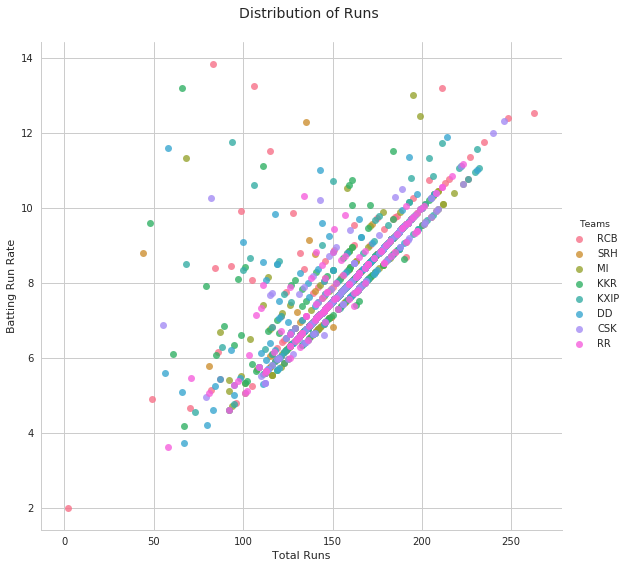

In [116]:
data = pysqldf("""Select match_id AS Id, batting_team AS Teams
                       ,(SUM(total_runs)) AS x
                       ,(sum(total_runs)/cast(count(ball)/6 as float)) as y
                       FROM deliveries
                       WHERE Teams IN ('CSK', 'DD', 'KXIP', 'KKR', 'MI', 'RR', 'RCB', 'SRH')
                       GROUP BY match_id, batting_team
                       ORDER BY match_id""")

lmplot = sns.lmplot(data=data, x="x", y="y", hue="Teams", size=8, fit_reg=False)
lmplot.set_axis_labels("Total Runs", "Batting Run Rate")
lmplot.fig.subplots_adjust(top=.92)
lmplot.fig.suptitle('Distribution of Runs', fontsize=14)

#### Batting Performance Evaluation

The below pair plot (scatter plot + density plot) compares the total runs scored by the team to the Batting Run Rate of the team per match. 

Batting Run Rate : Runs Scored / Overs Batted

#### Analysis

•	There is a strong positive correlation between Total Runs and Batting Run Rate

•	The trend line is almost linear. Increase in Total Runs leads to an similar increase in Batting Run Rate.(Runs Scored / Overs Batted)

•	The density plot of the Total Runs approx. resembles a Gaussian Curve. The peak density of Total Runs is between 125 and 175. Median = 155 approx.

•	The density plot of the Batting Run Rate approx. resembles a Gaussian Curve. The peak density of Batting Run Rate is between 6.25 and 8.75 Median = 8 approx. 

•	MI and CSK, RCB are the teams with highest Batting Run Rate and Total runs across board.



Text(0.5,0.98,'Comparison of Winning Percentage To Runs')

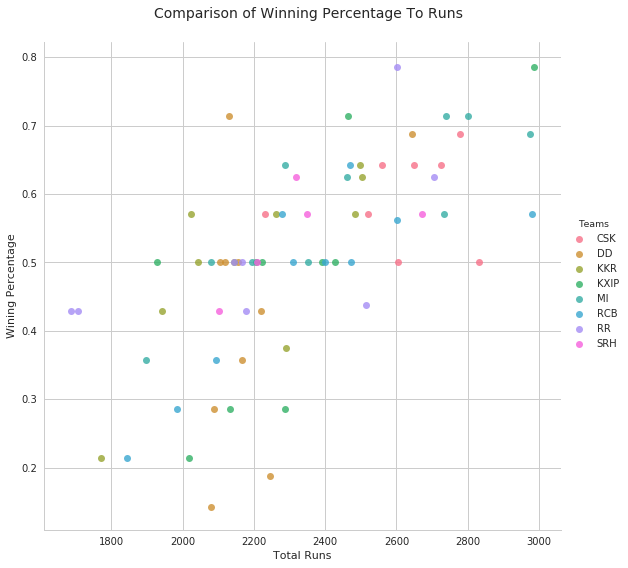

In [117]:
data = sqldf("""Select n.Team as Teams, winning_percentage AS y, 
               Total_Runs as x
               FROM indices_team n
               INNER JOIN stats_team t
               ON t.season = n.season AND t.team = n.team 
               WHERE n.Team IN ('CSK', 'DD', 'KXIP', 'KKR', 'MI', 'RR', 'RCB', 'SRH')
               ORDER BY n.Team""")

lmplot = sns.lmplot(data=data, x="x", y="y", hue="Teams", size=8, fit_reg=False)
lmplot.set_axis_labels("Total Runs", "Wining Percentage")
lmplot.fig.subplots_adjust(top=.92)
lmplot.fig.suptitle('Comparison of Winning Percentage To Runs', fontsize=14)


****************************************

Linear Regression :

****************************************

Shape of Train & Test Data

x train shape : (58, 9)
x test shape : (26, 9)
y train shape : (58,)
y test shape : (26,)

****************************************

Model Intercept

const               5684.705955
Batting_Run_Rate   -1771.493467
Bat_Avg             4683.791254
Bat_Wck_Rt         -6385.164710
Bat_Ind              340.787887
Bow_Stk_Rt         -6865.919572
Net_Avg             3624.770750
Net_Ind             -104.244196
win_per              852.546224
dtype: float64

****************************************

                            OLS Regression Results                            
Dep. Variable:             Total_Runs   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     8.675
Date:                Mon, 21 May 2018   Prob (F-statis

Text(0.5,0,'Total Runs: $y$')

Text(0,0.5,'Predicted Total Runs: $\\hat{y}$')

Text(0.5,1,'Total Runs vs Predicted Total Runs: $y$ vs $\\hat{y}$')

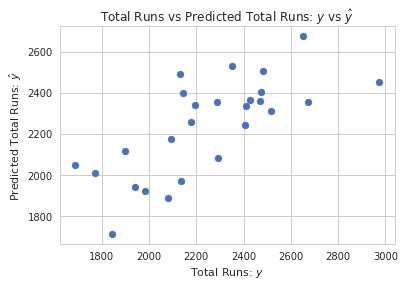

In [134]:
print('\n****************************************\n')
print("Linear Regression :")
print('\n****************************************\n')

data = sqldf("""SELECT it.Team, Batting_Run_Rate, Batting_Average AS Bat_Avg,  Batting_Wicket_Rate AS Bat_Wck_Rt,  
              Batting_Index AS Bat_Ind, Bowling_Economy_Rate AS Bow_Ecn_Rt, Bowling_Average AS Bow_Avg,  
              Bowling_Strike_Rate AS Bow_Stk_Rt, Bowling_Index AS Bow_Ind, Net_Run_Rate AS Net_Run_Rt, 
              Net_Average AS Net_Avg, Net_Rate As Net_Rt, Net_Index AS Net_Ind, 
              winning_percentage AS win_per, Total_Runs
              FROM indices_team it inner join stats_team st 
              ON it.season = st.season and it.Team = st.Team""")


print('Shape of Train & Test Data\n')
x = data.drop(['Total_Runs','Team','Bow_Ecn_Rt', 'Bow_Ind', 'Net_Run_Rt', 'Bow_Avg', 'Net_Rt'],axis=1)
y = data['Total_Runs']

# Split the data into train and test set
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.3)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)
print("x train shape : {}".format(x_train.shape)) 
print("x test shape : {}".format(x_test.shape)) 
print("y train shape : {}".format(y_train.shape)) 
print("y test shape : {}".format(y_test.shape)) 
print('\n****************************************\n')

# Train The Model
model = sm.OLS(y_train, x_train)
result = model.fit()

# Model Intercept
print('Model Intercept\n')
print(result.params)
print('\n****************************************\n')

# Summary Of The Model
print(result.summary())

# Predict The Model
y_hat = result.predict(x_test)

print('\n****************************************\n')

# Measure the mean square error 
mse_error = np.mean((y_hat - y_test) ** 2)
# (c) Print the mean squared error
print("Mean Square Error : {}".format(mse_error)) 

# Plot Predicted Vs. Actual Values
plt.scatter(y_test, y_hat)
plt.xlabel("Total Runs: $y$")
plt.ylabel("Predicted Total Runs: $\hat{y}$")
plt.title("Total Runs vs Predicted Total Runs: $y$ vs $\hat{y}$")


****************************************

Random Forest Regressor :

****************************************

Mean Square Error : 69772.57692307695
In statistics, the mean squared error (MSE) or mean squared deviation (MSD) of 
an estimator (of a procedure for estimating an unobserved quantity) measures the
average of the squares of the errors or deviations—that is,the difference between 
the estimator and what is estimated. 

The MSE is a measure of the quality of an estimator—it is always non-negative, 
and values closer to zero are better.

The MSE of Linear Regresssor is greater than the Random Forest Regressor. Thus
in comparison Random Forest Regressor is a better choice

****************************************

Test Scores :

Test Data R-2 Score: 0.20601064413867765
Test Data Spearman Correlation: SpearmanrResult(correlation=0.3292307692307692, pvalue=0.10051798247592172).
Test Data Pearson Correlation: (0.4624185901589009, 0.017381907798075684)

*****************************

Text(0.5,0,'Total Runs: $y$')

Text(0,0.5,'Predicted Total Runs: $b\\hat{y}rf$')

Text(0.5,1,'Total Runs vs Predicted Total Runs: $y$ vs $\\hat{y}$')

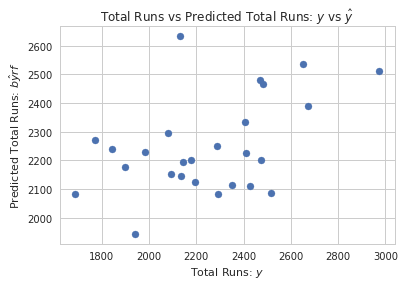

In [136]:
print('\n****************************************\n')
print("Random Forest Regressor :")
print('\n****************************************\n')

# Create a random forest Classifier. By convention, clf means 'Classifier'
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor()
result_rf = model_rf.fit(x_train,y_train)

# Predict The Model
y_hat_rf = result_rf.predict(x_test)

# Measure the mean square error 
mse_error_rf = np.mean((y_hat_rf - y_test) ** 2)

print('Mean Square Error : {}'.format(mse_error_rf)) 
print("""In statistics, the mean squared error (MSE) or mean squared deviation (MSD) of 
an estimator (of a procedure for estimating an unobserved quantity) measures the
average of the squares of the errors or deviations—that is,the difference between 
the estimator and what is estimated. """)
print("""\nThe MSE is a measure of the quality of an estimator—it is always non-negative, 
and values closer to zero are better.""")
print("""\nThe MSE of Linear Regresssor is greater than the Random Forest Regressor. Thus
in comparison Random Forest Regressor is a better choice""")

# Test Scores
print('\n****************************************\n')
print("Test Scores :\n")
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr

test_score = r2_score(y_test, y_hat_rf)
spearman = spearmanr(y_test, y_hat_rf)
pearson = pearsonr(y_test, y_hat_rf)

#print(f'Out-of-bag R-2 score estimate: {result_rf.oob_score_:.3}')
print('Test Data R-2 Score: {}'.format(test_score))
print('Test Data Spearman Correlation: {}.'.format(spearman))
print('Test Data Pearson Correlation: {}'.format(pearson))

print('\n****************************************\n')

# Plot Predicted Vs. Actual Values
plt.scatter(y_test, y_hat_rf)
plt.xlabel("Total Runs: $y$")
plt.ylabel("Predicted Total Runs: $b\hat{y}rf$")
plt.title("Total Runs vs Predicted Total Runs: $y$ vs $\hat{y}$")